In [1]:
import pandas as pd
import gcsfs
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import os


In [2]:

# Instantiate the GCSFileSystem
fs = gcsfs.GCSFileSystem(project=os.getenv("PROJECT_ID"))

# Define your GCS path
gcs_path = os.getenv("DATA_FILE_LOCATION")

# Read the CSV file from GCS
with fs.open(gcs_path, 'r') as f:
    df = pd.read_csv(f)

# Now df is a pandas DataFrame containing the data from your CSV
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genre'])
print(df.head())


   Unnamed: 0    artist_name        track_name                track_id  \
0           0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   
2           2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F   
3           3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz   
4           4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8   

   popularity  year     genre  danceability  energy  key  ...  mode  \
0          68  2012  acoustic         0.483   0.303    4  ...     1   
1          50  2012  acoustic         0.572   0.454    3  ...     1   
2          57  2012  acoustic         0.409   0.234    3  ...     1   
3          58  2012  acoustic         0.392   0.251   10  ...     1   
4          54  2012  acoustic         0.430   0.791    6  ...     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0429        0.6940          0.000000    

In [3]:
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_encoded
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00,3.737348e+01
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01,2.356640e+01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00,1.600000e+01
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00,3.600000e+01
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00,5.700000e+01
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00,8.100000e+01


In [4]:
df['duration_minutes'] = df['duration_ms'] / 60000


In [5]:
df = df[(df.duration_minutes > 0.5) & (df.duration_minutes < 10)]

In [6]:
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_encoded,duration_minutes
count,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06,1.142072e+06
mean,6.576674e+05,1.852014e+01,2.011991e+03,5.397818e-01,6.414035e-01,5.288934e+00,-8.919578e+00,6.345528e-01,9.264066e-02,3.194567e-01,2.486909e-01,2.223546e-01,4.580708e-01,1.215219e+02,2.397143e+05,3.888497e+00,3.742184e+01,3.995238e+00
std,4.283690e+05,1.591509e+01,6.801854e+00,1.831417e-01,2.696610e-01,3.555692e+00,5.633524e+00,4.815555e-01,1.261682e-01,3.539458e-01,3.634507e-01,2.002170e-01,2.678008e-01,2.970062e+01,9.314840e+04,4.596909e-01,2.357073e+01,1.552473e+00
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000100e+04,0.000000e+00,0.000000e+00,5.000167e-01
25%,2.893428e+05,5.000000e+00,2.006000e+03,4.160000e-01,4.560000e-01,2.000000e+00,-1.074500e+01,0.000000e+00,3.710000e-02,6.350000e-03,0.000000e+00,9.790000e-02,2.300000e-01,9.895700e+01,1.806398e+05,4.000000e+00,1.600000e+01,3.010663e+00
50%,5.771835e+05,1.500000e+01,2.012000e+03,5.530000e-01,6.950000e-01,5.000000e+00,-7.410000e+00,1.000000e+00,5.070000e-02,1.450000e-01,1.550000e-03,1.340000e-01,4.410000e-01,1.219740e+02,2.246530e+05,4.000000e+00,3.600000e+01,3.744217e+00
75%,1.029621e+06,2.900000e+01,2.018000e+03,6.780000e-01,8.740000e-01,8.000000e+00,-5.256000e+00,1.000000e+00,8.900000e-02,6.340000e-01,5.960000e-01,2.910000e-01,6.760000e-01,1.399340e+02,2.833240e+05,4.000000e+00,5.700000e+01,4.722067e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,5.999990e+05,5.000000e+00,8.100000e+01,9.999983e+00


<Axes: >

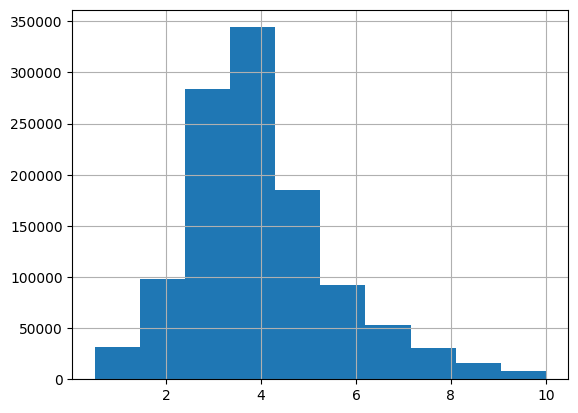

In [7]:
df.duration_minutes.hist()

In [8]:
target = "popularity"

num_features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "tempo", "duration_minutes", "valence", "liveness"]
cat_features = ["genre_encoded"]

In [9]:
df.shape

(1142072, 22)

In [10]:
df = shuffle(df, random_state=0)
df.reset_index(drop=True, inplace=True)

In [16]:
train_data = df[:14000]
val_data = df[14000:20000]

In [17]:
model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [18]:
model.fit(train_data[num_features + cat_features], train_data[target])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [19]:
val_preds = model.predict(val_data[num_features + cat_features])
val_data['prediction'] = val_preds

train_preds = model.predict(train_data[num_features + cat_features])
train_data['prediction'] = train_preds

/tmp/ipykernel_24699/1489025095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['prediction'] = val_preds
/tmp/ipykernel_24699/1489025095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['prediction'] = train_preds


In [20]:
print(mean_absolute_error(val_data.popularity, val_data.prediction))
print(mean_absolute_error(train_data.popularity, train_data.prediction))

11.601965258556714
11.274866332655346


In [21]:
val_data = val_data[[c for c in df if c not in ["popularity", "prediction"]] + ["popularity", "prediction"]]

In [23]:
df.corr()

/tmp/ipykernel_24699/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_encoded,duration_minutes
Unnamed: 0,1.000000,-0.198431,-0.513109,-0.014026,-0.004786,0.003567,-0.019878,0.020412,-0.016932,0.011909,-0.001990,0.009986,0.069326,-0.002413,0.057935,-0.001896,0.046138,0.057935
popularity,-0.198431,1.000000,0.344662,0.094308,0.006523,0.000354,0.100685,-0.023624,-0.023010,-0.056347,-0.149967,-0.056155,-0.022527,-0.000596,-0.136654,0.026914,-0.094126,-0.136654
year,-0.513109,0.344662,1.000000,0.037486,0.016536,-0.003451,0.037534,-0.031392,0.029983,-0.022148,0.016836,-0.014973,-0.104690,0.017157,-0.111464,0.006246,-0.007317,-0.111464
danceability,-0.014026,0.094308,0.037486,1.000000,0.133007,0.030952,0.250082,-0.052534,0.085595,-0.172989,-0.161130,-0.120855,0.514733,-0.026976,0.046585,0.177724,-0.000834,0.046585
energy,-0.004786,0.006523,0.016536,0.133007,1.000000,0.037992,0.781170,-0.052074,0.114874,-0.753450,-0.181972,0.189948,0.245054,0.264882,0.077294,0.174814,-0.064080,0.077294
key,0.003567,0.000354,-0.003451,0.030952,0.037992,1.000000,0.026310,-0.167573,0.013231,-0.034160,0.000378,-0.005565,0.025515,0.009076,0.017825,0.010607,-0.006159,0.017825
loudness,-0.019878,0.100685,0.037534,0.250082,0.781170,0.026310,1.000000,-0.019023,0.024160,-0.621929,-0.402017,0.092333,0.290376,0.232571,0.019837,0.174339,-0.039326,0.019837
mode,0.020412,-0.023624,-0.031392,-0.052534,-0.052074,-0.167573,-0.019023,1.000000,-0.021045,0.067490,-0.058825,0.024885,0.018754,-0.004828,-0.066353,-0.016988,0.014433,-0.066353
speechiness,-0.016932,-0.023010,0.029983,0.085595,0.114874,0.013231,0.024160,-0.021045,1.000000,0.029962,-0.141199,0.282113,0.037709,-0.032228,-0.102735,-0.029710,-0.106330,-0.102735
acousticness,0.011909,-0.056347,-0.022148,-0.172989,-0.753450,-0.034160,-0.621929,0.067490,0.029962,1.000000,0.092614,-0.031606,-0.101389,-0.241021,-0.161936,-0.174194,0.120973,-0.161936
